In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [3]:
ads = pd.read_csv("Social_Network_Ads.csv")
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
X = ads.loc[:,('User ID', 'Gender', 'Age')]
X = pd.get_dummies(X, prefix='Gender', columns=['Gender'])
y = ads['Purchased']
print("Label kelas : ", np.unique(y))

Label kelas :  [0 1]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.93657932 -1.78179743 -1.02020406  1.02020406]
 [ 1.66838653 -0.25358736 -1.02020406  1.02020406]
 [-0.32087714 -1.11320552  0.98019606 -0.98019606]
 [-1.23369247 -1.01769239  0.98019606 -0.98019606]
 [ 1.57138881 -1.78179743 -1.02020406  1.02020406]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[ 1.65272325 -1.11320552 -1.02020406  1.02020406]
 [-1.36686523  2.13424088 -1.02020406  1.02020406]
 [-1.00788145  0.03295203  0.98019606 -0.98019606]
 [ 1.69869307  0.22397829 -1.02020406  1.02020406]
 [ 1.51847461  0.41500455  0.98019606 -0.98019606]]
y Training: 92     0
223    1
234    0
232    1
377    0
Name: Purchased, dtype: int64


In [14]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [15]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1]


Akurasi : 86.66666666666667 %


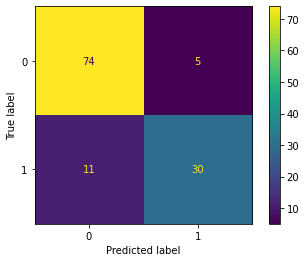

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))